Number of Omega-automaton states (including the trap state): 3


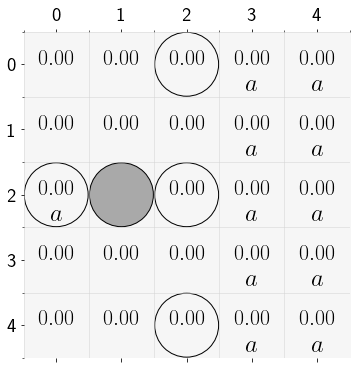

In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np

# Specification
ltl = 'F G a & G !b'
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (5,5)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'T',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['T',  'B',  'T',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'T',  'E',  'E']
])

label = np.array([
    [(),        (),        (),     ('a',),        ('a',)],
    [(),        (),        (),     ('a',),        ('a',)],
    [('a',),    (),        (),     ('a',),        ('a',)],
    [(),        (),        (),     ('a',),        ('a',)],
    [(),        (),        (),     ('a',),        ('a',)],
],dtype=np.object)

# discount = 0.999999
# discountB = 0.9999
# discountB = 0.99
reward = np.zeros(shape)
# reward[3,0] = 1-discountB

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=6,second_agent=('b',))  # Use figsize=4 for smaller figures
grid_mdp.plot()
# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [2]:
value = np.load('value.npy')

In [3]:
policy, policy_ = csrl.get_greedy_policies(value)

In [4]:
csrl.plot(policy=policy)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

In [19]:
episode=csrl.simulate(policy,policy_,start=(0,4),start_=(4,0),T=1000,plot=True)

interactive(children=(IntSlider(value=0, description='t', max=999), Output()), _dom_classes=('widget-interact'…

In [6]:
episode[4]

(0, 0, 0, 4, 4, 0)